In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer

In [2]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state =0,stratify=y)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [3]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
54,15.100,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,...,18.100,31.69,117.70,1030.0,0.1389,0.20570,0.27120,0.15300,0.2675,0.07873
114,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,...,9.628,19.62,64.48,284.4,0.1724,0.23640,0.24560,0.10500,0.2926,0.10170
256,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,25.050,36.27,178.60,1926.0,0.1281,0.53290,0.42510,0.19410,0.2818,0.10050
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,...,11.260,24.39,73.07,390.2,0.1301,0.29500,0.34860,0.09910,0.2614,0.11620
52,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,0.06110,...,13.100,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408


In [4]:
def plot_boxplot_and_hist(data, variable):
    
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    sns.boxplot(x=data[variable], ax=ax_box,color="orange")
    sns.histplot(data=data, x=variable, ax=ax_hist,color="orange")

    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

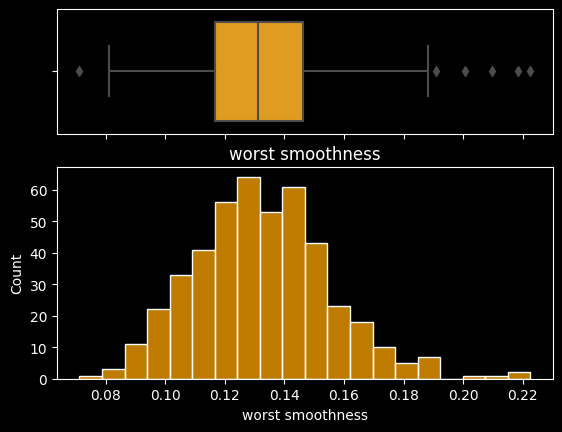

In [5]:
plot_boxplot_and_hist(X_train, "worst smoothness")

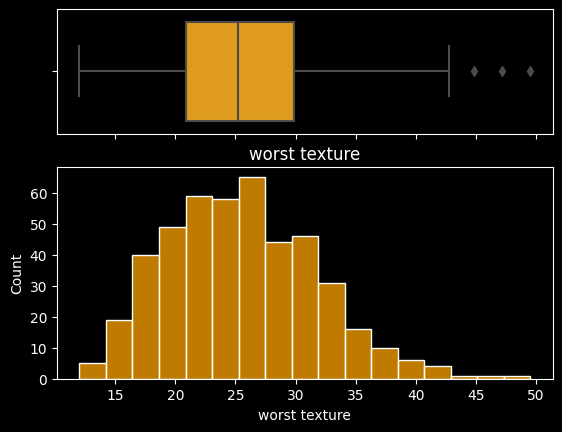

In [6]:
plot_boxplot_and_hist(X_train, "worst texture")

In [7]:
capper = Winsorizer(
    variables=["worst smoothness","worst texture"],
    capping_method="gaussian",
    tail="both",
    fold=2
)
capper.fit(X_train)

Winsorizer(fold=2, tail='both', variables=['worst smoothness', 'worst texture'])

In [8]:
capper.left_tail_caps_

{'worst smoothness': 0.08701180548067555, 'worst texture': 13.159760003261523}

In [9]:
capper.right_tail_caps_

{'worst smoothness': 0.17791799671712666, 'worst texture': 38.023800436298906}

In [10]:
train_t = capper.transform(X_train)
test_t = capper.transform(X_test)

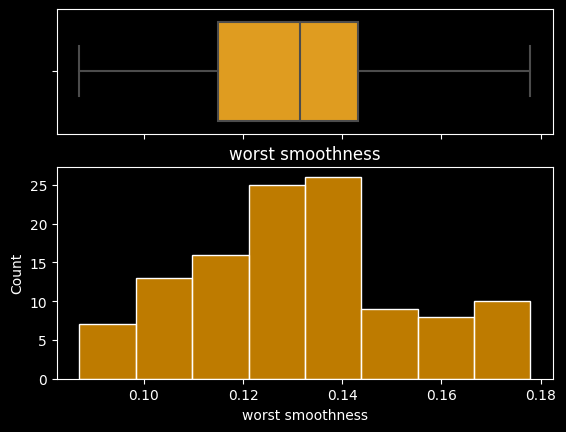

In [12]:
plot_boxplot_and_hist(test_t, "worst smoothness")

In [13]:
# iqr
capper = Winsorizer(
    variables=["worst smoothness","worst texture"],
    capping_method="iqr",
    tail="both",
    fold=1.5
)
capper.fit(X_train)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['worst smoothness', 'worst texture'])

In [14]:
capper.left_tail_caps_

{'worst smoothness': 0.07259999999999997, 'worst texture': 7.404999999999998}

In [15]:
capper.right_tail_caps_

{'worst smoothness': 0.19060000000000002, 'worst texture': 43.36500000000001}

In [20]:
capper = Winsorizer(
    variables=["worst smoothness","worst texture"],
    capping_method="quanitile",
    tail="both",
    fold=0.05
)
capper.fit(X_train)

Winsorizer(capping_method='iqr', fold=0.05, tail='both',
           variables=['worst smoothness', 'worst texture'])

In [18]:
capper.left_tail_caps_

{'worst smoothness': 0.11537499999999999, 'worst texture': 20.4405}

In [19]:
capper.right_tail_caps_

{'worst smoothness': 0.147825, 'worst texture': 30.329500000000003}